# Projet 7 : Implémentez un modèle de scoring : LightGBM

L'objectif de ce notebook est d'évaluer notre classification avec LightGBM

[LightGBM](https://datascience.eu/fr/apprentissage-automatique/quest-ce-que-la-gbm-legere/) est un algorithme de machine learning basé sur le Gradient Boosting Machine (GBM), il est rapide, distribué, avec de grandes performances et repose sur des arbres de décisions.


Paramètres : 

- (max_depth) :  contrôle la distance maximale entre le nœud racine de chaque arbre et un nœud feuille. Diminuer max_depth réduit le temps d'entraînement. 
- (num_leaves):  définit le nombre maximal de nœuds par arbre. Diminuer num_leaves réduit le temps de entraînement.

## Importation des modules

In [1]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [3]:
import shap

In [4]:
import numpy as np 
import pandas as pd

## PLOT
import matplotlib.pyplot as plt
import seaborn as sns


## Modelisation
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold
import lightgbm as lgb

## Scores
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  make_scorer



## Threshold
from yellowbrick.classifier.threshold import discrimination_threshold

## Export
import pickle

## Warning
import warnings

In [5]:
warnings.filterwarnings("ignore")

##  Importation de données

In [6]:
use_colab = True 

if use_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    PATH ='/content/drive/MyDrive/'
else:
    PATH ='/data/'

Mounted at /content/drive


In [7]:
dataset = pd.read_csv(PATH + 'df_final.csv')

In [8]:
X_train_smtomek = pd.read_csv(PATH+"X_train_smtomek_bis.csv")
y_train_smtomek = pd.read_csv(PATH+"y_train_smtomek_bis.csv")

In [9]:
X_test_smtomek =  pd.read_csv(PATH+"X_test_smtomek_bis.csv")
y_test_smtomek = pd.read_csv(PATH+"y_test_smtomek_bis.csv")

In [10]:
X_train_smtomek.shape[0]

31556

In [11]:
X_test_smtomek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123005 entries, 0 to 123004
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       123005 non-null  float64
 1   1       123005 non-null  float64
 2   2       123005 non-null  float64
 3   3       123005 non-null  float64
 4   4       123005 non-null  float64
 5   5       123005 non-null  float64
 6   6       123005 non-null  float64
 7   7       123005 non-null  float64
dtypes: float64(8)
memory usage: 7.5 MB


## Mise en place du modèle

In [12]:
from sklearn.metrics import fbeta_score,make_scorer,recall_score,precision_score

In [13]:
f2_scorer = make_scorer(fbeta_score, beta=2.0)
recall_scorer = make_scorer(recall_score)

In [14]:
from sklearn.model_selection import KFold, StratifiedKFold
from lightgbm import LGBMClassifier

In [15]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [16]:
accuracy= []
recall =[]
roc_auc= []
precision = []

lgbmc_3=LGBMClassifier(random_state=0,scale_pos_weight=1.1)

lgbmc_3.fit(X_train_smtomek, y_train_smtomek,categorical_feature = 'auto',eval_set=(X_test_smtomek, y_test_smtomek),feature_name='auto', verbose=0)

y_pred = lgbmc_3.predict(X_test_smtomek)

accuracy.append(round(accuracy_score(y_test_smtomek, y_pred),4))
recall.append(round(recall_score(y_test_smtomek, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test_smtomek, y_pred),4))
precision.append(round(precision_score(y_test_smtomek, y_pred),4))

model_names = ['LightGBM_adjusted_weight_3']
result_df8 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df8


clf=lgbmc_3

In [17]:
print(f'Accuracy: {accuracy_score(y_train_smtomek, clf.predict(X_train_smtomek))}')
print(f'Precision: {precision_score(y_train_smtomek, clf.predict(X_train_smtomek))}')
print(f'Recall: {recall_score(y_train_smtomek, clf.predict(X_train_smtomek))}')

Accuracy: 0.6497338065661047
Precision: 0.6272626282428282
Recall: 0.6421594862188922


In [18]:
print(f'Accuracy: {accuracy_score(y_test_smtomek, clf.predict(X_test_smtomek))}')
print(f'Precision: {precision_score(y_test_smtomek, clf.predict(X_test_smtomek))}')
print(f'Recall: {recall_score(y_test_smtomek, clf.predict(X_test_smtomek))}')

Accuracy: 0.591414983130767
Precision: 0.110274673306696
Recall: 0.5784144983294522


In [19]:
y_pred=clf.predict(X_test_smtomek)

In [20]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test_smtomek)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test_smtomek, y_pred)))

LightGBM Model accuracy score: 0.5914


In [21]:
y_pred_train = clf.predict(X_train_smtomek)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_smtomek, y_pred_train)))

Training-set accuracy score: 0.6497


In [22]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smtomek, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[67034 46094]
 [ 4164  5713]]

True Positives(TP) =  67034

True Negatives(TN) =  5713

False Positives(FP) =  46094

False Negatives(FN) =  4164


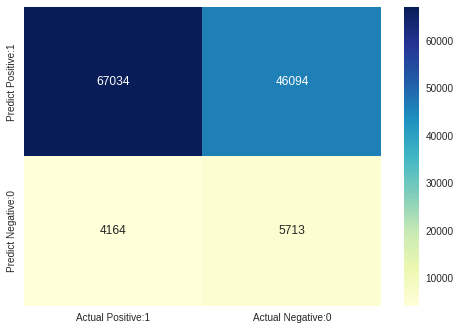

In [23]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test_smtomek, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.59      0.73    113128
           1       0.11      0.58      0.19      9877

    accuracy                           0.59    123005
   macro avg       0.53      0.59      0.46    123005
weighted avg       0.87      0.59      0.68    123005



In [25]:
from sklearn import metrics

In [26]:
auc_roc=metrics.roc_auc_score(y_test_smtomek,y_pred)
auc_roc

0.5854822650759064

In [27]:
y_prob = clf.predict_proba(X_test_smtomek)[:,1] 

In [28]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smtomek, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6159138672913953

Text(0.5, 0, 'False Positive Rate')

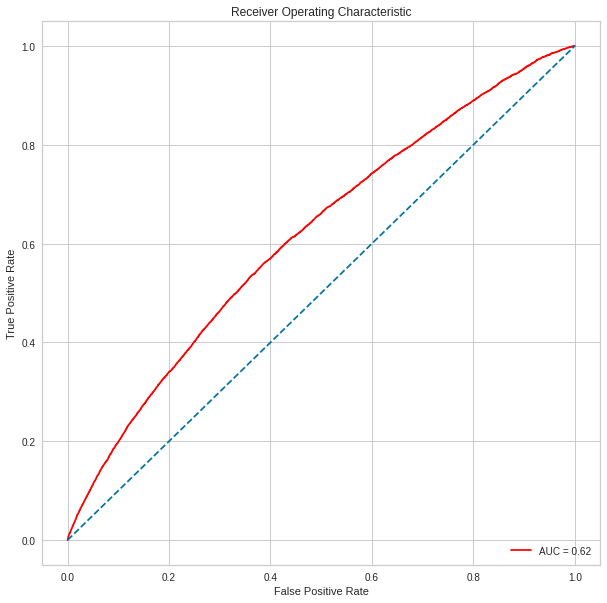

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Le score AUC est bon et relève d'un modèle dans l'ensemble performant et c'est la raison pour laquelle il est souvent utilisé dans les compétitions Kaggle.

In [30]:
prediction = clf.predict(X_test_smtomek)
print(prediction)

[1 0 0 ... 0 0 0]


Fonction de cout métier

In [31]:
predictions = clf.predict(X_test_smtomek)
recall_results = recall_score(y_test_smtomek,predictions)
f2_results = fbeta_score(y_test_smtomek,predictions,beta=2.0)
precision_results = precision_score(y_test_smtomek,predictions)
print('Precision Score: %.3f' % (precision_results))
print('F2 Score: %.3f' % (f2_results))
print('Recall Score: %.3f' % (recall_results))

Precision Score: 0.110
F2 Score: 0.313
Recall Score: 0.578


Text(0.5, 1.0, 'Fbeta scores with beta 0 to 100')

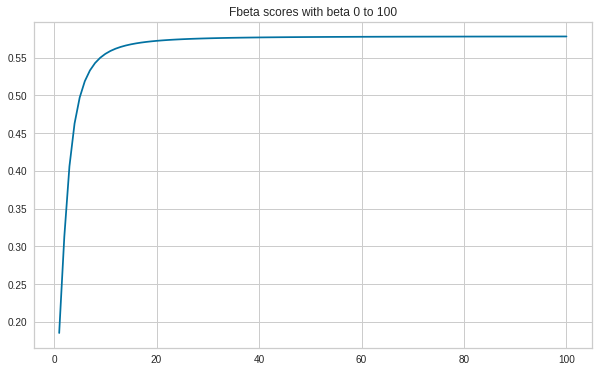

In [32]:
beta_score_list = []
for i in range(1,101):
    fbeta_results = fbeta_score(y_test_smtomek,predictions,beta=i)
    beta_score_list.append(fbeta_results)
fig2 = plt.figure(figsize=(10,6))
sns.lineplot(x=range(1,101),y=beta_score_list)
plt.title("Fbeta scores with beta 0 to 100")

In [33]:
fbeta_score(y_test_smtomek, y_pred,beta=40)

0.5768848288745632

On conclut ici que Fbeta étant le plus élevé à Beta = 40, le recall est le seul score réellement important, on peut donc négliger la précision ici. Notre focus est donc de réduire le taux de faux-négatifs. De plus le Fbeta ayant un max de 0.55 on en conclut que le modèle ici est moyennement performant.

On sauvegarde le modèle en format pkl, pour l'utiliser dans Streamlit.

In [34]:
pickle_out = open(PATH + "LightGBMmodel.pkl", "wb")
pickle.dump(clf, pickle_out)
pickle_out.close()